# **ENOE - Encuesta Nacional de Ocupación y Empleo**

La ENOE es una encuesta realizada en México por el INEGI (Instituto Nacional de Estadística y Geografía). Esta encuesta tiene como objetivo principal proporcionar un panorama sobre las características ocupacionales y laborales de la población mexicana. Algunos de los aspectos que se analizan a través de la ENOE incluyen:

- Tasa de desocupación.
- Tasa de informalidad.
- Tasa de subocupación.
- Tasa de condiciones críticas de ocupación.
- Tasa de participación económica.
- Y muchos otros indicadores relacionados con el empleo y la ocupación.

**Contexto**

La información proporcionada por la ENOE es vital para la toma de decisiones por parte del gobierno y diversas instituciones, tanto públicas como privadas. Con estos datos, es posible identificar áreas geográficas o sectores económicos con mayores problemas de desempleo, subempleo o informalidad, lo que permite dirigir políticas públicas y estrategias para mejorar la situación laboral en el país.

**¿Para qué puede servir la ENOE?**

1. **Diseño de políticas públicas:** Los gobiernos pueden utilizar la información para diseñar y ajustar políticas de empleo, formación profesional y desarrollo económico.

2. **Investigación académica:** Los investigadores en áreas como economía, sociología y demografía utilizan los datos para analizar tendencias laborales, desigualdades, movilidad social, entre otros.

3. **Decisiones empresariales:** Las empresas pueden usar la ENOE para conocer las tendencias del mercado laboral en diferentes regiones del país, lo que puede influir en decisiones sobre dónde establecer operaciones o cómo diseñar estrategias de recursos humanos.

4. **Transparencia y rendición de cuentas:** Al ser una encuesta de acceso público, permite a la ciudadanía conocer el estado del mercado laboral y evaluar el desempeño de las políticas gubernamentales en esta área.

En resumen, la ENOE es una herramienta fundamental para entender la dinámica laboral en México, y su información es vital para diseñar estrategias que promuevan un desarrollo económico equitativo y sostenible en el país.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Encuesta Nacional de Ocupación y Empleo (ENOE) => Estructura de la tabla de datos del sociodemográfico



- Campo 24 (SEX): 1 = Hombre y 2= Mujer
- Campo 25 (EDA): Edad, revisar invalidos en la tabla (00, 97-99)
- Campo 31 (CS_P13_1): Nivel de estudios (no años de estudio, revisar tabla)
- Campo 33 (CCS_P14_C): Interesante para conocer las mas estudiadas, de forma segmentada

- Campo 81

In [3]:
DB = pd.read_csv("ENOE_SDEMT123.csv", sep=",", encoding="latin-1")

C:\Users\lfvvi\AppData\Local\Temp\ipykernel_21104\92391124.py:1: DtypeWarning: Columns (2,5,8,22,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  DB = pd.read_csv("ENOE_SDEMT123.csv", sep=",", encoding="latin-1")


In [4]:
DB.size
Y_dim, X_dim = DB.shape

In [28]:
salario_mujer = round(DB[ (DB['ingocup'] > 0) & (DB['sex'] == 2) ]['ingocup'],2)
salario_me_mujer = salario_mujer.mean()
salario_mo_mujer = salario_mujer.median()
salario_p_mujer_count = salario_mujer.count()

salario_hombre = round(DB[ (DB['ingocup'] > 0) & (DB['sex'] == 1) ]['ingocup'],2)
salario_me_hombre = salario_hombre.mean()
salario_mo_hombre = salario_hombre.median()
salario_p_hombre_count = salario_hombre.count()


print(f'1. El salario de los hombre es ${salario_me_hombre}, el de las mujeres es ${salario_me_mujer}, por lo que un hombre gana el promedio mas {round(salario_me_hombre - salario_me_mujer,2)}')

print(f"2. La proporción de hombres es de {round(salario_p_hombre_count/(salario_p_hombre_count+salario_p_mujer_count)*100,2)}% vs {round(salario_p_mujer_count/(salario_p_hombre_count+salario_p_mujer_count)*100,2)}% ")

1. El salario de los hombre es $9849.213017678328, el de las mujeres es $7546.1660758442995, por lo que un hombre gana el promedio mas 2303.05
2. La proporción de hombres es de 58.31% vs 41.69% 


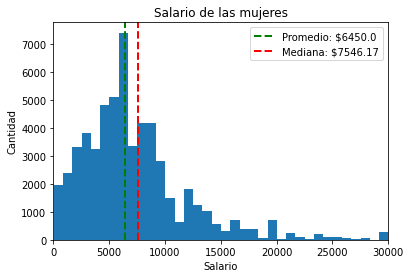

In [ ]:
# Create the histogram with a specified number of bins and normalized density
plt.hist(DB[ (DB['ingocup'] > 0) & (DB['sex'] == 2) ]['ingocup'], bins=300)

# Set the X-axis range (adjust the limits as per your desired range)
plt.xlim(0, 30000)  # Replace 0 and 100000 with your desired lower and upper limits

# Add a vertical line at the mean value
plt.axvline(salario_mo_mujer, color='green', linestyle='dashed', linewidth=2, label=f'Promedio: ${round(salario_mo_mujer,2)}')
plt.axvline(salario_me_mujer, color='red', linestyle='dashed', linewidth=2, label=f'Mediana: ${round(salario_me_mujer,2)}')

# Add labels and a title to the plot (optional but recommended)
plt.xlabel('Salario')
plt.ylabel('Cantidad')
plt.title('Salario de las mujeres')

plt.legend()
plt.show()

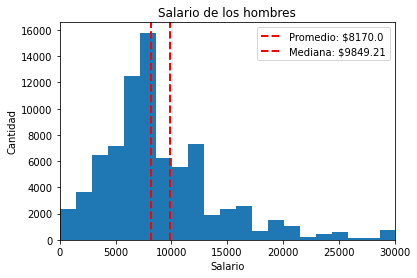

In [ ]:
# Create the histogram with a specified number of bins and normalized density
plt.hist(DB[ (DB['ingocup'] > 0) & (DB['sex'] == 1) ]['ingocup'], bins=300)

# Set the X-axis range (adjust the limits as per your desired range)
plt.xlim(0, 30000,)  # Replace 0 and 100000 with your desired lower and upper limits

# Add a vertical line at the mean value
plt.axvline(salario_mo_hombre, color='red', linestyle='dashed', linewidth=2, label=f'Promedio: ${round(salario_mo_hombre,2)}')
plt.axvline(salario_me_hombre, color='red', linestyle='dashed', linewidth=2, label=f'Mediana: ${round(salario_me_hombre,2)}')

# Add labels and a title to the plot (optional but recommended)
plt.xlabel('Salario')
plt.ylabel('Cantidad')
plt.title('Salario de los hombres')

plt.legend()
plt.show()

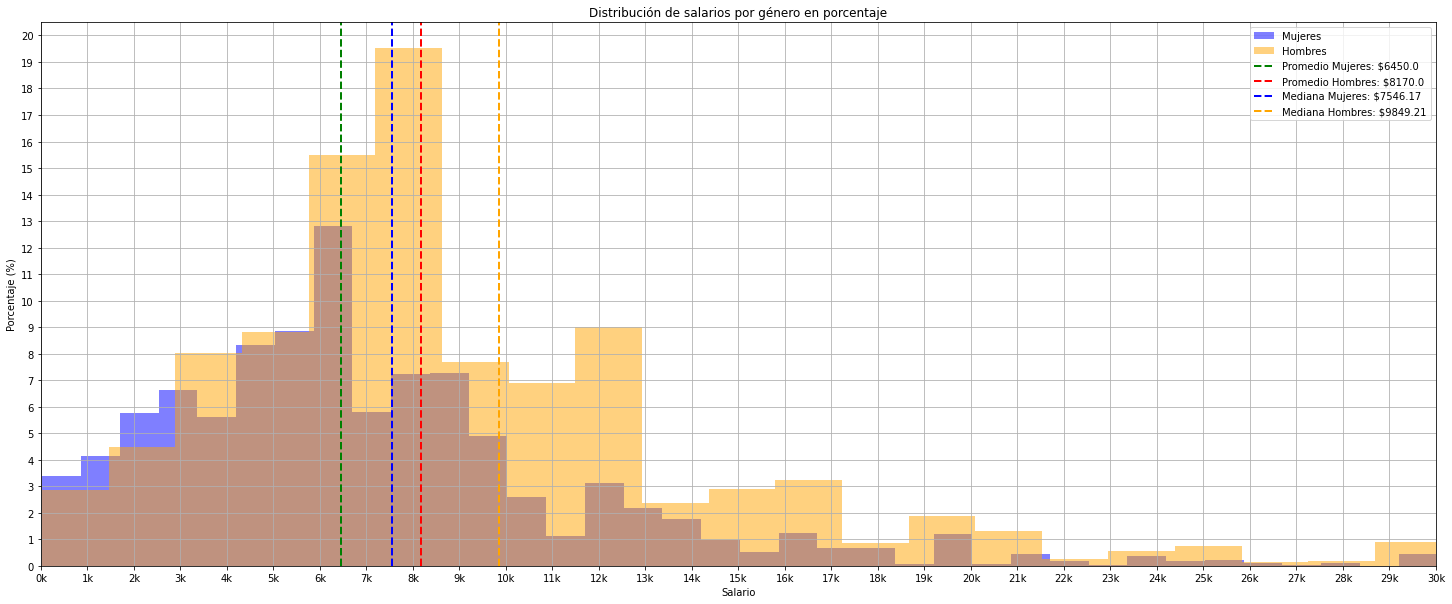

In [26]:
# Definir propiedades comunes para la visualización
bins = 300
range_x = (0, 30000)
ticks_loc = np.arange(0, 30001, 1000) #Eje x
ticks_locY = np.arange(0, 21, 1) #Eje x

# Crear una figura con un tamaño específico
plt.figure(figsize=(25, 10))

# Crear el histograma para las mujeres
weights_mujer = np.ones_like(DB[ (DB['ingocup'] > 0) & (DB['sex'] == 2) ]['ingocup']) / len(DB[ (DB['ingocup'] > 0) & (DB['sex'] == 2) ]['ingocup']) * 100
plt.hist(DB[ (DB['ingocup'] > 0) & (DB['sex'] == 2) ]['ingocup'], bins=bins, alpha=0.5, label='Mujeres', color='blue', weights=weights_mujer)

# Crear el histograma para los hombres
weights_hombre = np.ones_like(DB[ (DB['ingocup'] > 0) & (DB['sex'] == 1) ]['ingocup']) / len(DB[ (DB['ingocup'] > 0) & (DB['sex'] == 1) ]['ingocup']) * 100
plt.hist(DB[ (DB['ingocup'] > 0) & (DB['sex'] == 1) ]['ingocup'], bins=bins, alpha=0.5, label='Hombres', color='orange', weights=weights_hombre)

# Configuraciones adicionales de la gráfica
plt.xlim(*range_x)
plt.axvline(salario_mo_mujer, color='green', linestyle='dashed', linewidth=2, label=f'Promedio Mujeres: ${round(salario_mo_mujer,2)}')
plt.axvline(salario_mo_hombre, color='red', linestyle='dashed', linewidth=2, label=f'Promedio Hombres: ${round(salario_mo_hombre,2)}')
plt.axvline(salario_me_mujer, color='blue', linestyle='dashed', linewidth=2, label=f'Mediana Mujeres: ${round(salario_me_mujer,2)}')
plt.axvline(salario_me_hombre, color='orange', linestyle='dashed', linewidth=2, label=f'Mediana Hombres: ${round(salario_me_hombre,2)}')

# Etiquetas y título
plt.xlabel('Salario')
plt.ylabel('Porcentaje (%)')
plt.title('Distribución de salarios por género en porcentaje')
plt.legend(loc='upper right')  # Posición de la leyenda

plt.grid(True)

#Labels X-Axis
plt.xticks(ticks_loc)
labels = [f"{int(tick/1000)}k" for tick in ticks_loc]
plt.xticks(ticks_loc, labels)

#Labels y-Axis
plt.yticks(ticks_locY)

plt.show()

In [98]:
Igual_Menor_30 = DB[ (DB['ingocup'] > 0) & (DB['ingocup'] <= 25000 ) ]['ingocup'].count()
Total = DB[ (DB['ingocup'] > 0) ]['ingocup'].count()

Proporcion_30 = Igual_Menor_30 / Total

print(Proporcion_30)

Columnas = ['Salario','Procentaje de la población', 'Porcentaje de hombres', 'Porcentaje de mujeres']

SALARIOS = pd.DataFrame(columns=Columnas)

SALARIOS.loc[0, 'Salario'] = '0k - 2.5k'
SALARIOS.loc[1, 'Salario'] = '2.5k - 5k'
SALARIOS.loc[2, 'Salario'] = '5k - 7.5k'
SALARIOS.loc[3, 'Salario'] = '7.5k - 10k'
SALARIOS.loc[4, 'Salario'] = '10k - 12.5k'
SALARIOS.loc[5, 'Salario'] = '12.5k - 15k'
SALARIOS.loc[6, 'Salario'] = '15k - 17.5k'
SALARIOS.loc[7, 'Salario'] = '17.5k - 20k'
SALARIOS.loc[8, 'Salario'] = '20k - 22.5k'
SALARIOS.loc[9, 'Salario'] = '22.5k - 25k'
SALARIOS.loc[10, 'Salario'] = '25k - 27.5k'
SALARIOS.loc[11, 'Salario'] = '27.5k - 30k'
SALARIOS.loc[12, 'Salario'] = '30k - 32.5k'
SALARIOS.loc[13, 'Salario'] = '32.5k - 35k'
SALARIOS.loc[14, 'Salario'] = '35k - 37.5k'
SALARIOS.loc[15, 'Salario'] = '37.5k - 40k'

# Porcentaje de la población en general por salario
SALARIOS.loc[0, 'Procentaje de la población'] = round((DB[ (DB['ingocup'] > 0) & (DB['ingocup'] <= 2500) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0) ]['ingocup'].count()),4)
SALARIOS.loc[1, 'Procentaje de la población'] = round((DB[ (DB['ingocup'] > 2500) & (DB['ingocup'] <= 5000) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0) ]['ingocup'].count()),4)
SALARIOS.loc[2, 'Procentaje de la población'] = round((DB[ (DB['ingocup'] > 5000) & (DB['ingocup'] <= 7500) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0) ]['ingocup'].count()),4)
SALARIOS.loc[3, 'Procentaje de la población'] = round((DB[ (DB['ingocup'] > 7500) & (DB['ingocup'] <= 10000) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0) ]['ingocup'].count()),4)
SALARIOS.loc[4, 'Procentaje de la población'] = round((DB[ (DB['ingocup'] > 10000) & (DB['ingocup'] <= 12500) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0) ]['ingocup'].count()),4)
SALARIOS.loc[5, 'Procentaje de la población'] = round((DB[ (DB['ingocup'] > 12500) & (DB['ingocup'] <= 15000) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0) ]['ingocup'].count()),4)
SALARIOS.loc[6, 'Procentaje de la población'] = round((DB[ (DB['ingocup'] > 15000) & (DB['ingocup'] <= 17500) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0) ]['ingocup'].count()),4)
SALARIOS.loc[7, 'Procentaje de la población'] = round((DB[ (DB['ingocup'] > 17500) & (DB['ingocup'] <= 20000) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0) ]['ingocup'].count()),4)
SALARIOS.loc[8, 'Procentaje de la población'] = round((DB[ (DB['ingocup'] > 20000) & (DB['ingocup'] <= 22500) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0) ]['ingocup'].count()),4)
SALARIOS.loc[9, 'Procentaje de la población'] = round((DB[ (DB['ingocup'] > 22500) & (DB['ingocup'] <= 25000) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0) ]['ingocup'].count()),4)
SALARIOS.loc[10, 'Procentaje de la población'] = round((DB[ (DB['ingocup'] > 25000) & (DB['ingocup'] <= 27500) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0) ]['ingocup'].count()),4)
SALARIOS.loc[11, 'Procentaje de la población'] = round((DB[ (DB['ingocup'] > 27500) & (DB['ingocup'] <= 30000) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0) ]['ingocup'].count()),4)
SALARIOS.loc[12, 'Procentaje de la población'] = round((DB[ (DB['ingocup'] > 30000) & (DB['ingocup'] <= 32500) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0) ]['ingocup'].count()),4)
SALARIOS.loc[13, 'Procentaje de la población'] = round((DB[ (DB['ingocup'] > 32500) & (DB['ingocup'] <= 35000) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0) ]['ingocup'].count()),4)
SALARIOS.loc[14, 'Procentaje de la población'] = round((DB[ (DB['ingocup'] > 35000) & (DB['ingocup'] <= 37500) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0) ]['ingocup'].count()),4)
SALARIOS.loc[15, 'Procentaje de la población'] = round((DB[ (DB['ingocup'] > 37500) & (DB['ingocup'] <= 40000) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0) ]['ingocup'].count()),4)
SALARIOS['Procentaje de la población'] = SALARIOS['Procentaje de la población'].apply(lambda x: x * 100)

# Porcentaje de la población en masculina por salario
SALARIOS.loc[0, 'Porcentaje de hombres'] = round((DB[ (DB['ingocup'] > 0) & (DB['ingocup'] <= 2500)  & (DB['sex'] == 1) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 1) ]['ingocup'].count()),4)
SALARIOS.loc[1, 'Porcentaje de hombres'] = round((DB[ (DB['ingocup'] > 2500) & (DB['ingocup'] <= 5000)  & (DB['sex'] == 1) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 1) ]['ingocup'].count()),4)
SALARIOS.loc[2, 'Porcentaje de hombres'] = round((DB[ (DB['ingocup'] > 5000) & (DB['ingocup'] <= 7500)  & (DB['sex'] == 1) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 1) ]['ingocup'].count()),4)
SALARIOS.loc[3, 'Porcentaje de hombres'] = round((DB[ (DB['ingocup'] > 7500) & (DB['ingocup'] <= 10000)  & (DB['sex'] == 1) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 1) ]['ingocup'].count()),4)
SALARIOS.loc[4, 'Porcentaje de hombres'] = round((DB[ (DB['ingocup'] > 10000) & (DB['ingocup'] <= 12500)  & (DB['sex'] == 1) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 1) ]['ingocup'].count()),4)
SALARIOS.loc[5, 'Porcentaje de hombres'] = round((DB[ (DB['ingocup'] > 12500) & (DB['ingocup'] <= 15000)  & (DB['sex'] == 1) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 1) ]['ingocup'].count()),4)
SALARIOS.loc[6, 'Porcentaje de hombres'] = round((DB[ (DB['ingocup'] > 15000) & (DB['ingocup'] <= 17500)  & (DB['sex'] == 1) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 1) ]['ingocup'].count()),4)
SALARIOS.loc[7, 'Porcentaje de hombres'] = round((DB[ (DB['ingocup'] > 17500) & (DB['ingocup'] <= 20000)  & (DB['sex'] == 1) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 1) ]['ingocup'].count()),4)
SALARIOS.loc[8, 'Porcentaje de hombres'] = round((DB[ (DB['ingocup'] > 20000) & (DB['ingocup'] <= 22500)  & (DB['sex'] == 1) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 1) ]['ingocup'].count()),4)
SALARIOS.loc[9, 'Porcentaje de hombres'] = round((DB[ (DB['ingocup'] > 22500) & (DB['ingocup'] <= 25000)  & (DB['sex'] == 1) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 1) ]['ingocup'].count()),4)
SALARIOS.loc[10, 'Porcentaje de hombres'] = round((DB[ (DB['ingocup'] > 25000) & (DB['ingocup'] <= 27500)  & (DB['sex'] == 1) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 1) ]['ingocup'].count()),4)
SALARIOS.loc[11, 'Porcentaje de hombres'] = round((DB[ (DB['ingocup'] > 27500) & (DB['ingocup'] <= 30000)  & (DB['sex'] == 1) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 1) ]['ingocup'].count()),4)
SALARIOS.loc[12, 'Porcentaje de hombres'] = round((DB[ (DB['ingocup'] > 30000) & (DB['ingocup'] <= 32500)  & (DB['sex'] == 1) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 1) ]['ingocup'].count()),4)
SALARIOS.loc[13, 'Porcentaje de hombres'] = round((DB[ (DB['ingocup'] > 32500) & (DB['ingocup'] <= 35000)  & (DB['sex'] == 1) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 1) ]['ingocup'].count()),4)
SALARIOS.loc[14, 'Porcentaje de hombres'] = round((DB[ (DB['ingocup'] > 35000) & (DB['ingocup'] <= 37500)  & (DB['sex'] == 1) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 1) ]['ingocup'].count()),4)
SALARIOS.loc[15, 'Porcentaje de hombres'] = round((DB[ (DB['ingocup'] > 37500) & (DB['ingocup'] <= 40000)  & (DB['sex'] == 1) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 1) ]['ingocup'].count()),4)
SALARIOS['Porcentaje de hombres'] = SALARIOS['Porcentaje de hombres'].apply(lambda x: x * 100)

# Porcentaje de la población en femenina por salario
SALARIOS.loc[0, 'Porcentaje de mujeres'] = round((DB[ (DB['ingocup'] > 0) & (DB['ingocup'] <= 2500)  & (DB['sex'] == 2) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 2) ]['ingocup'].count()),4)
SALARIOS.loc[1, 'Porcentaje de mujeres'] = round((DB[ (DB['ingocup'] > 2500) & (DB['ingocup'] <= 5000)  & (DB['sex'] == 2) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 2) ]['ingocup'].count()),4)
SALARIOS.loc[2, 'Porcentaje de mujeres'] = round((DB[ (DB['ingocup'] > 5000) & (DB['ingocup'] <= 7500)  & (DB['sex'] == 2) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 2) ]['ingocup'].count()),4)
SALARIOS.loc[3, 'Porcentaje de mujeres'] = round((DB[ (DB['ingocup'] > 7500) & (DB['ingocup'] <= 10000)  & (DB['sex'] == 2) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 2) ]['ingocup'].count()),4)
SALARIOS.loc[4, 'Porcentaje de mujeres'] = round((DB[ (DB['ingocup'] > 10000) & (DB['ingocup'] <= 12500)  & (DB['sex'] == 2) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 2) ]['ingocup'].count()),4)
SALARIOS.loc[5, 'Porcentaje de mujeres'] = round((DB[ (DB['ingocup'] > 12500) & (DB['ingocup'] <= 15000)  & (DB['sex'] == 2) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 2) ]['ingocup'].count()),4)
SALARIOS.loc[6, 'Porcentaje de mujeres'] = round((DB[ (DB['ingocup'] > 15000) & (DB['ingocup'] <= 17500)  & (DB['sex'] == 2) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 2) ]['ingocup'].count()),4)
SALARIOS.loc[7, 'Porcentaje de mujeres'] = round((DB[ (DB['ingocup'] > 17500) & (DB['ingocup'] <= 20000)  & (DB['sex'] == 2) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 2) ]['ingocup'].count()),4)
SALARIOS.loc[8, 'Porcentaje de mujeres'] = round((DB[ (DB['ingocup'] > 20000) & (DB['ingocup'] <= 22500)  & (DB['sex'] == 2) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 2) ]['ingocup'].count()),4)
SALARIOS.loc[9, 'Porcentaje de mujeres'] = round((DB[ (DB['ingocup'] > 22500) & (DB['ingocup'] <= 25000)  & (DB['sex'] == 2) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 2) ]['ingocup'].count()),4)
SALARIOS.loc[10, 'Porcentaje de mujeres'] = round((DB[ (DB['ingocup'] > 25000) & (DB['ingocup'] <= 27500)  & (DB['sex'] == 2) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 2) ]['ingocup'].count()),4)
SALARIOS.loc[11, 'Porcentaje de mujeres'] = round((DB[ (DB['ingocup'] > 27500) & (DB['ingocup'] <= 30000)  & (DB['sex'] == 2) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 2) ]['ingocup'].count()),4)
SALARIOS.loc[12, 'Porcentaje de mujeres'] = round((DB[ (DB['ingocup'] > 30000) & (DB['ingocup'] <= 32500)  & (DB['sex'] == 2) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 2) ]['ingocup'].count()),4)
SALARIOS.loc[13, 'Porcentaje de mujeres'] = round((DB[ (DB['ingocup'] > 32500) & (DB['ingocup'] <= 35000)  & (DB['sex'] == 2) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 2) ]['ingocup'].count()),4)
SALARIOS.loc[14, 'Porcentaje de mujeres'] = round((DB[ (DB['ingocup'] > 35000) & (DB['ingocup'] <= 37500)  & (DB['sex'] == 2) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 2) ]['ingocup'].count()),4)
SALARIOS.loc[15, 'Porcentaje de mujeres'] = round((DB[ (DB['ingocup'] > 37500) & (DB['ingocup'] <= 40000)  & (DB['sex'] == 2) ]['ingocup'].count() / DB[ (DB['ingocup'] > 0)  & (DB['sex'] == 2) ]['ingocup'].count()),4)
SALARIOS['Porcentaje de mujeres'] = SALARIOS['Porcentaje de mujeres'].apply(lambda x: x * 100)

SALARIOS

0.9713165599722098


,Salario,Procentaje de la población,Porcentaje de hombres,Porcentaje de mujeres
0,0k - 2.5k,9.18,5.91,13.28
1,2.5k - 5k,15.58,11.66,20.57
2,5k - 7.5k,25.29,23.90,27.18
3,7.5k - 10k,22.83,25.36,19.65
4,10k - 12.5k,9.24,11.05,6.85
5,12.5k - 15k,6.93,8.48,4.94
6,15k - 17.5k,3.83,4.90,2.45
7,17.5k - 20k,2.36,2.71,1.94
8,20k - 22.5k,1.16,1.53,0.67
9,22.5k - 25k,0.74,0.87,0.58
